In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data 

In [2]:
wine_data = pd.read_csv("winequality-red.csv")

In [3]:
print(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# we will find out how many different types of quality score there are
print("Quality points: ", wine_data['quality'].unique())

Quality points:  [5 6 7 4 8 3]


In [7]:
# Let's see how many of each quality score
print(wine_data['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


Text(0.5, 1.0, 'Distributions of quality scores')

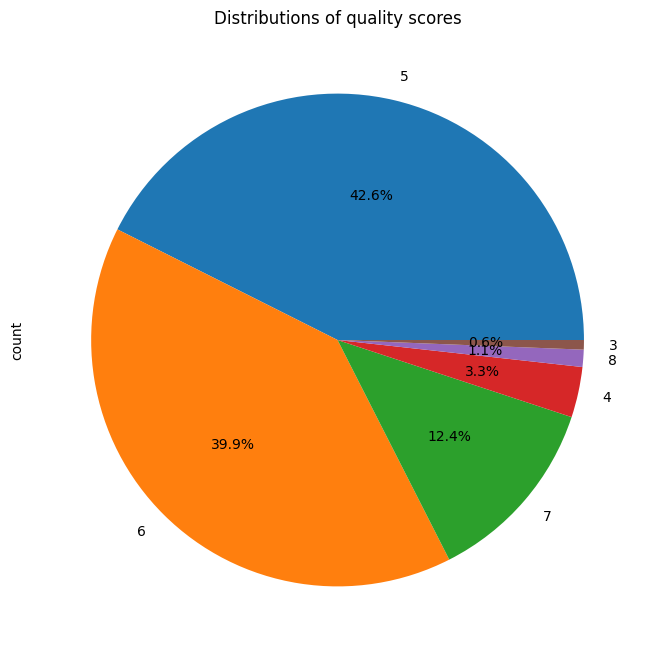

In [8]:
plt.figure(1, figsize=(8,8))
wine_data['quality'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distributions of quality scores")

In [9]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# VISUALIZATION

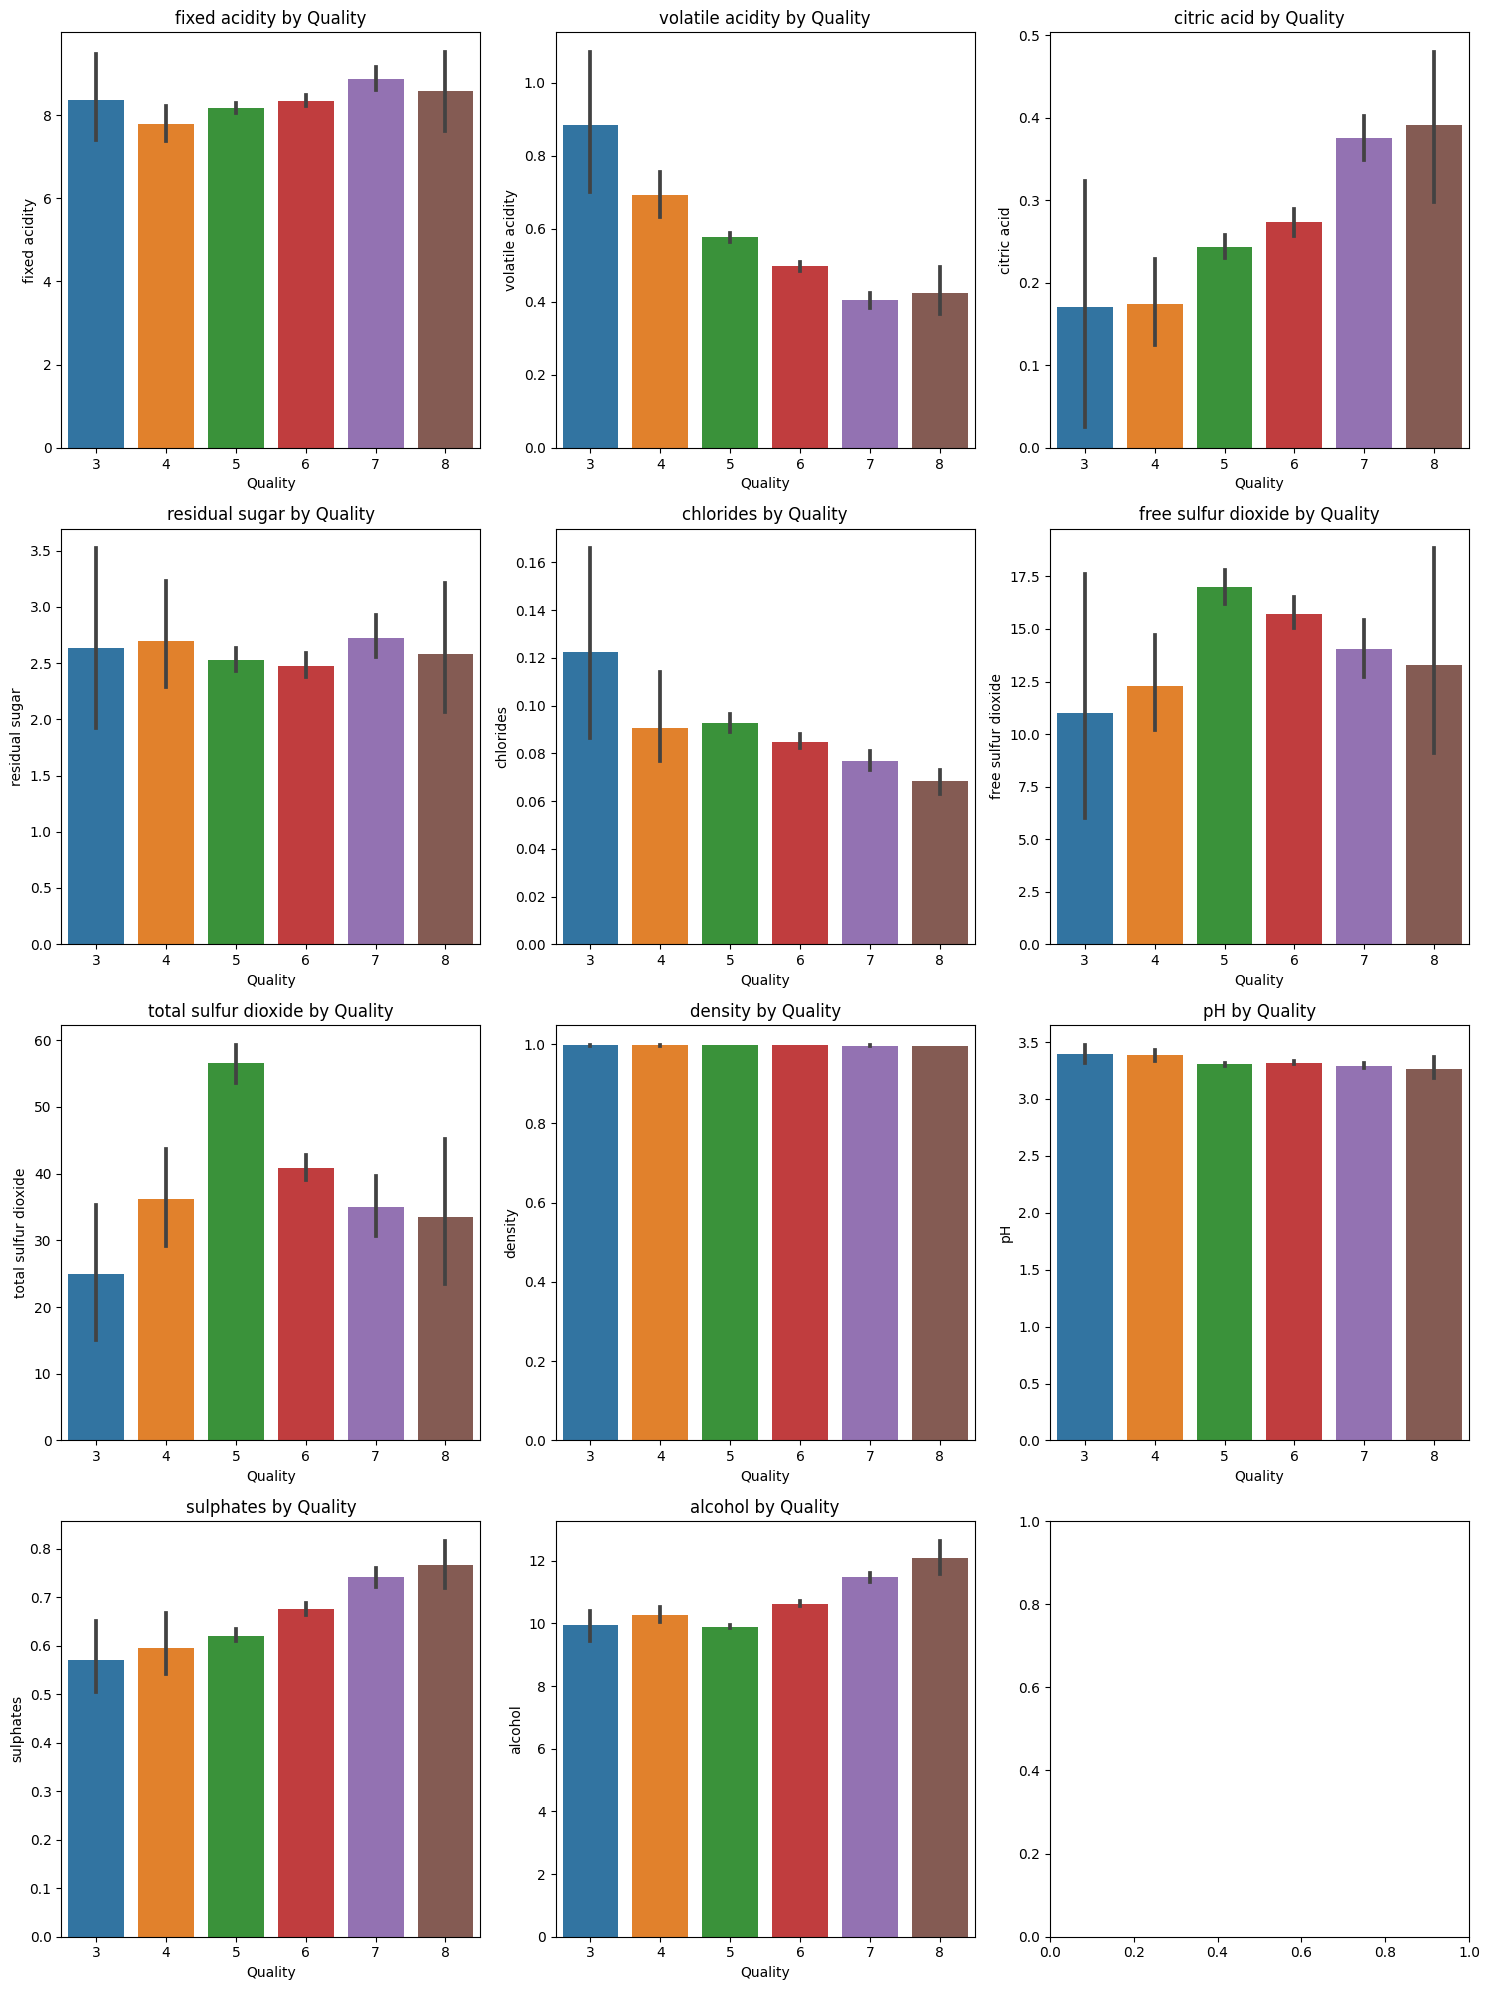

In [10]:
def plot_quality_feature_bar(data):
    features = data.columns[:-1]  # Get all attributes, we assume the last column is "quality"
    
    num_features = len(features)
    num_cols = 3  # You can adjust it to fit three plots in two columns
    num_rows = (num_features - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols

        ax = axes[row, col]
        sns.barplot(data=data, x='quality', y=feature, ax=ax)
        ax.set_title(f'{feature} by Quality', fontsize=12)
        ax.set_xlabel('Quality', fontsize=10)
        ax.set_ylabel(feature, fontsize=10)

    plt.tight_layout()
    plt.show()

plot_quality_feature_bar(wine_data)

In [11]:
def plot_quality_relationship_box(data):
    features = wine_data.columns[:-1]  # Get all attributes, we assume the last column is "quality"
    
    num_features = len(features)
    num_cols = 3  # You can adjust it to fit three plots in two columns
    num_rows = (num_features - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols

        ax = axes[row, col]
        sns.boxplot(data=data, x='quality', y=feature, ax=ax)
        ax.set_title(f'{feature} by Quality', fontsize=12)
        ax.set_xlabel('Quality', fontsize=10)
        ax.set_ylabel(feature, fontsize=10)

    plt.tight_layout()
    plt.show()


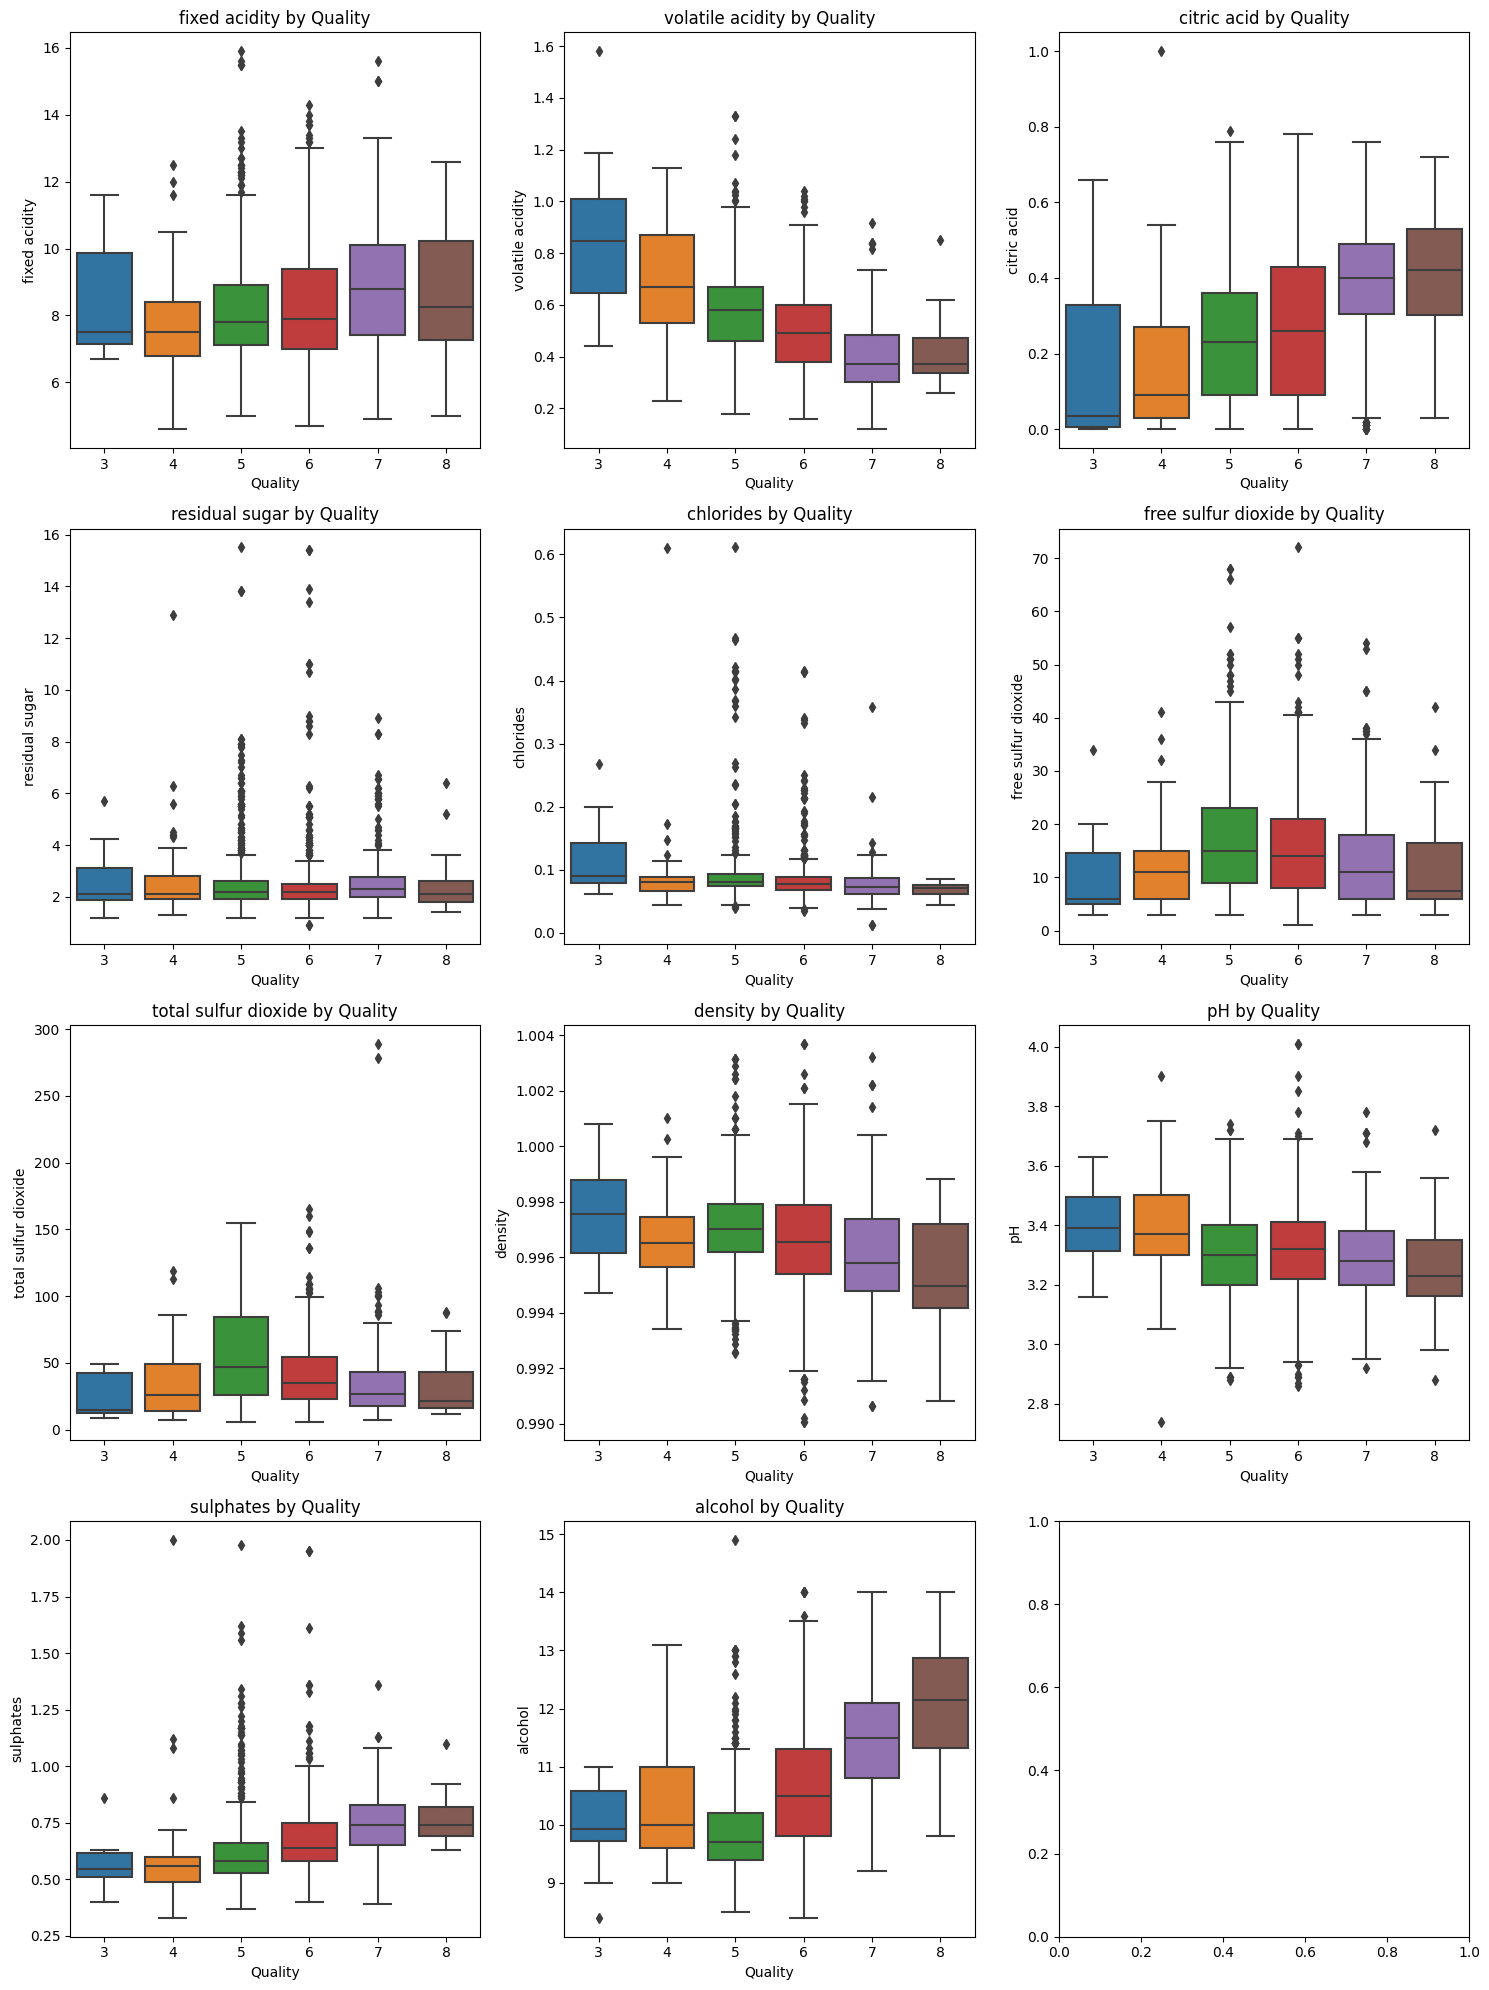

In [12]:
plot_quality_relationship_box(wine_data)

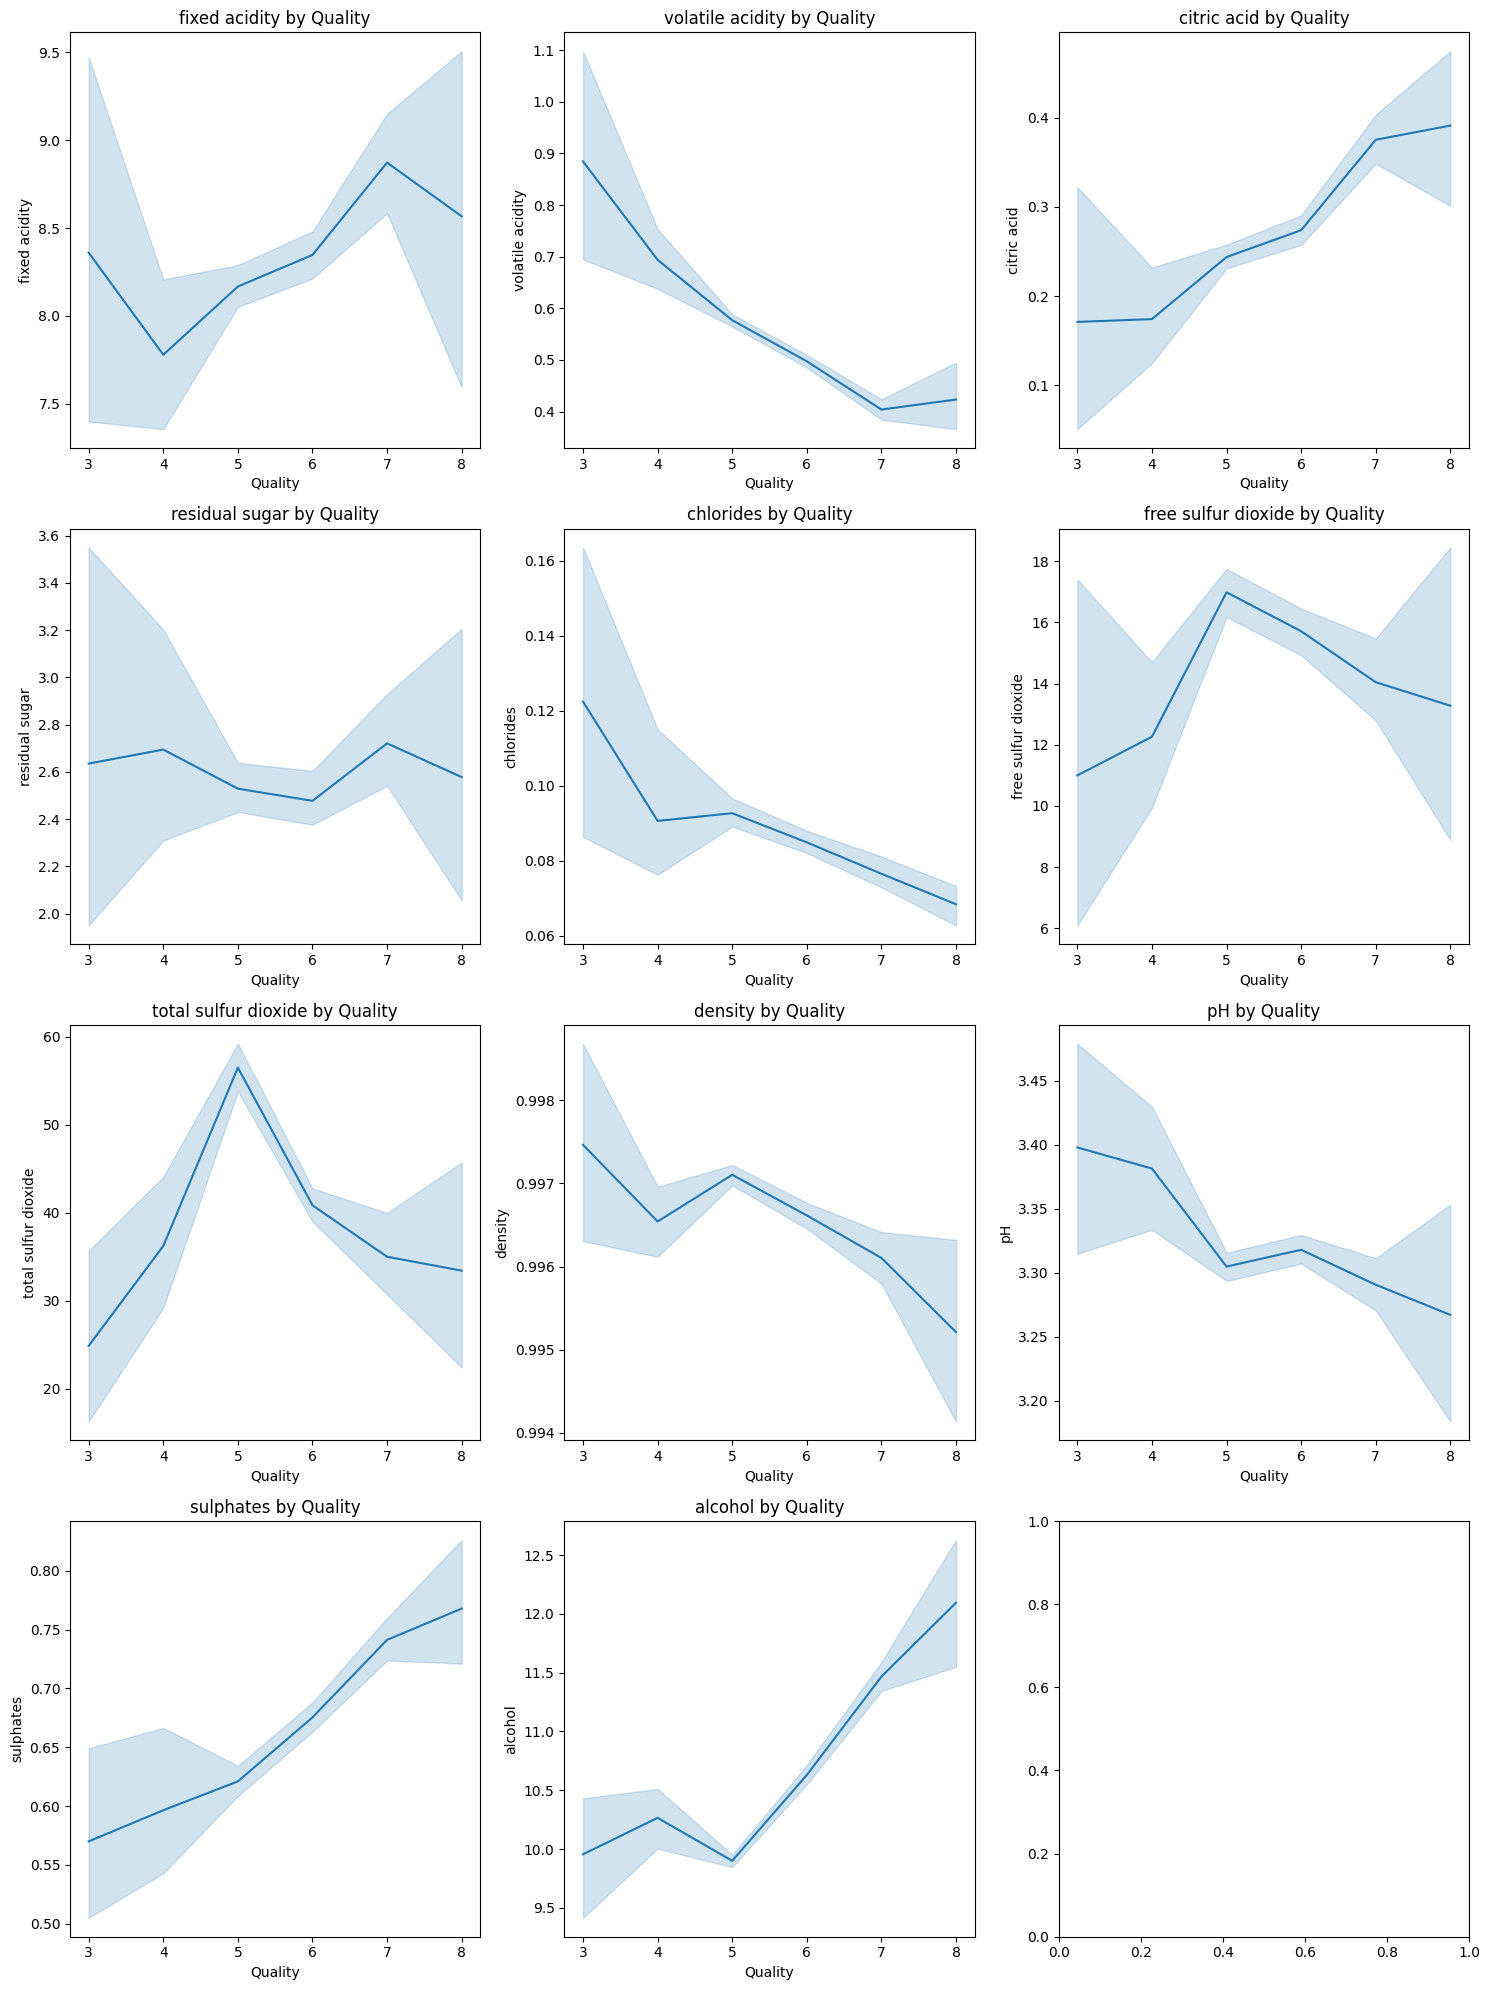

In [13]:
def plot_quality_relationship_line(data):
    features = wine_data.columns[:-1]  # Get all attributes, we assume the last column is "quality"
    
    num_features = len(features)
    num_cols = 3  # You can adjust it to fit three plots in two columns
    num_rows = (num_features - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols

        ax = axes[row, col]
        sns.lineplot(data=wine_data, x='quality', y=feature, ax=ax)
        ax.set_title(f'{feature} by Quality', fontsize=12)
        ax.set_xlabel('Quality', fontsize=10)
        ax.set_ylabel(feature, fontsize=10)

    plt.tight_layout()
    plt.show()

plot_quality_relationship_line(wine_data)

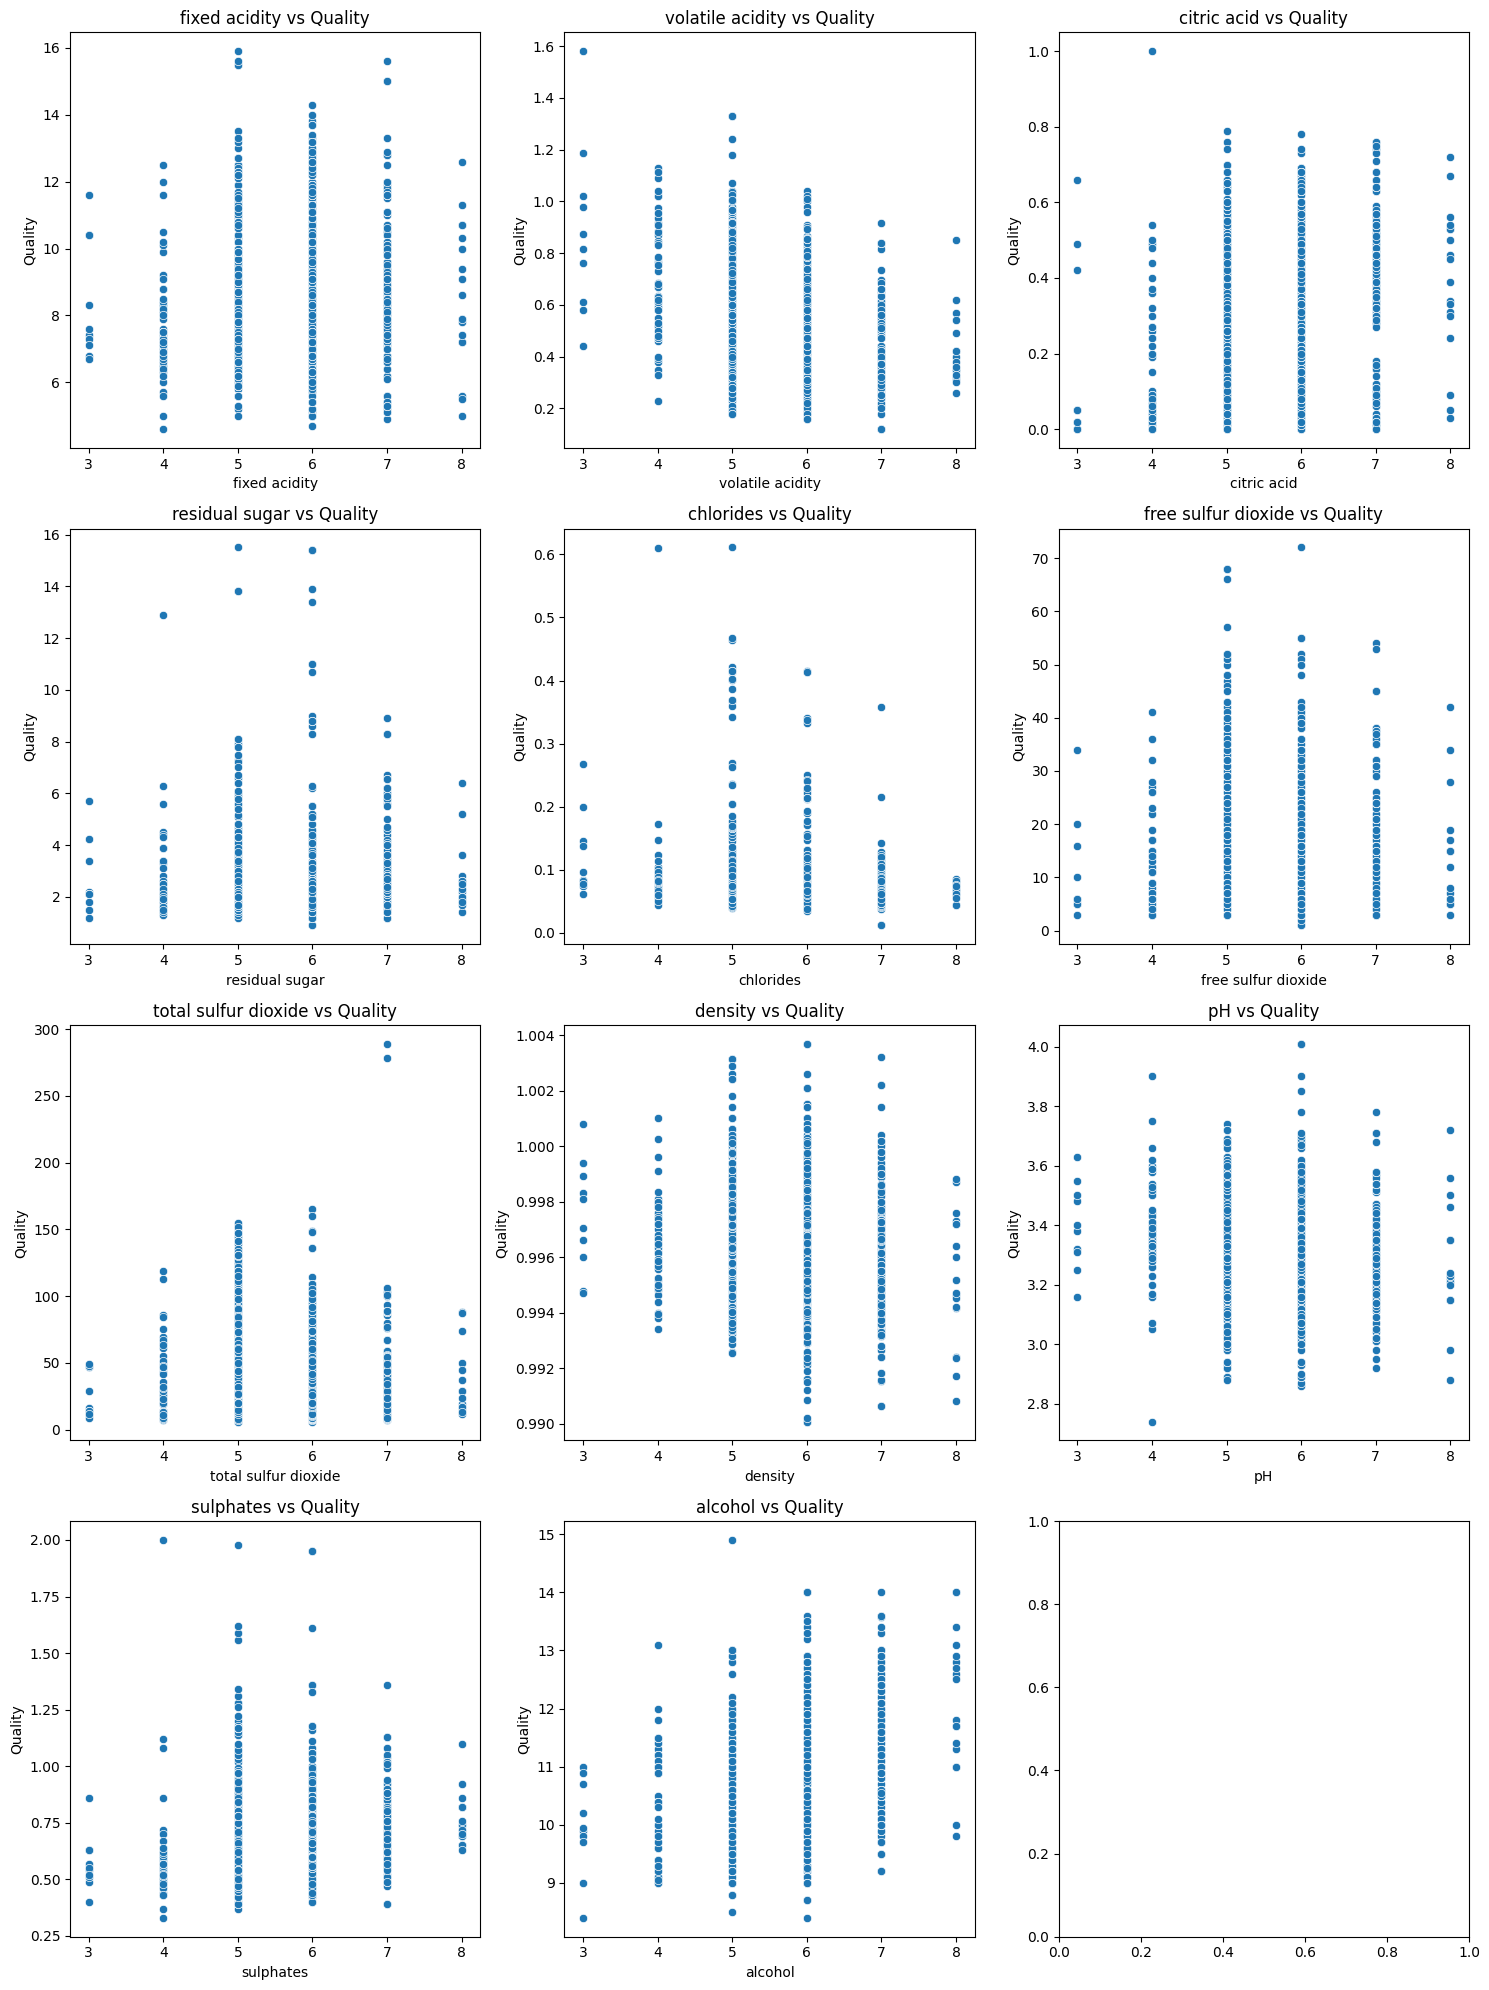

In [14]:
def plot_quality_relationship_scatter(data):
    features = wine_data.columns[:-1]  # Get all attributes, we assume the last column is "quality"
    
    num_features = len(features)
    num_cols = 3  # You can adjust it to fit three plots in two columns
    num_rows = (num_features - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols

        ax = axes[row, col]
        sns.scatterplot(data=data, x='quality', y=feature, ax=ax)
        ax.set_title(f'{feature} vs Quality', fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Quality', fontsize=10)

    plt.tight_layout()
    plt.show()

plot_quality_relationship_scatter(wine_data)

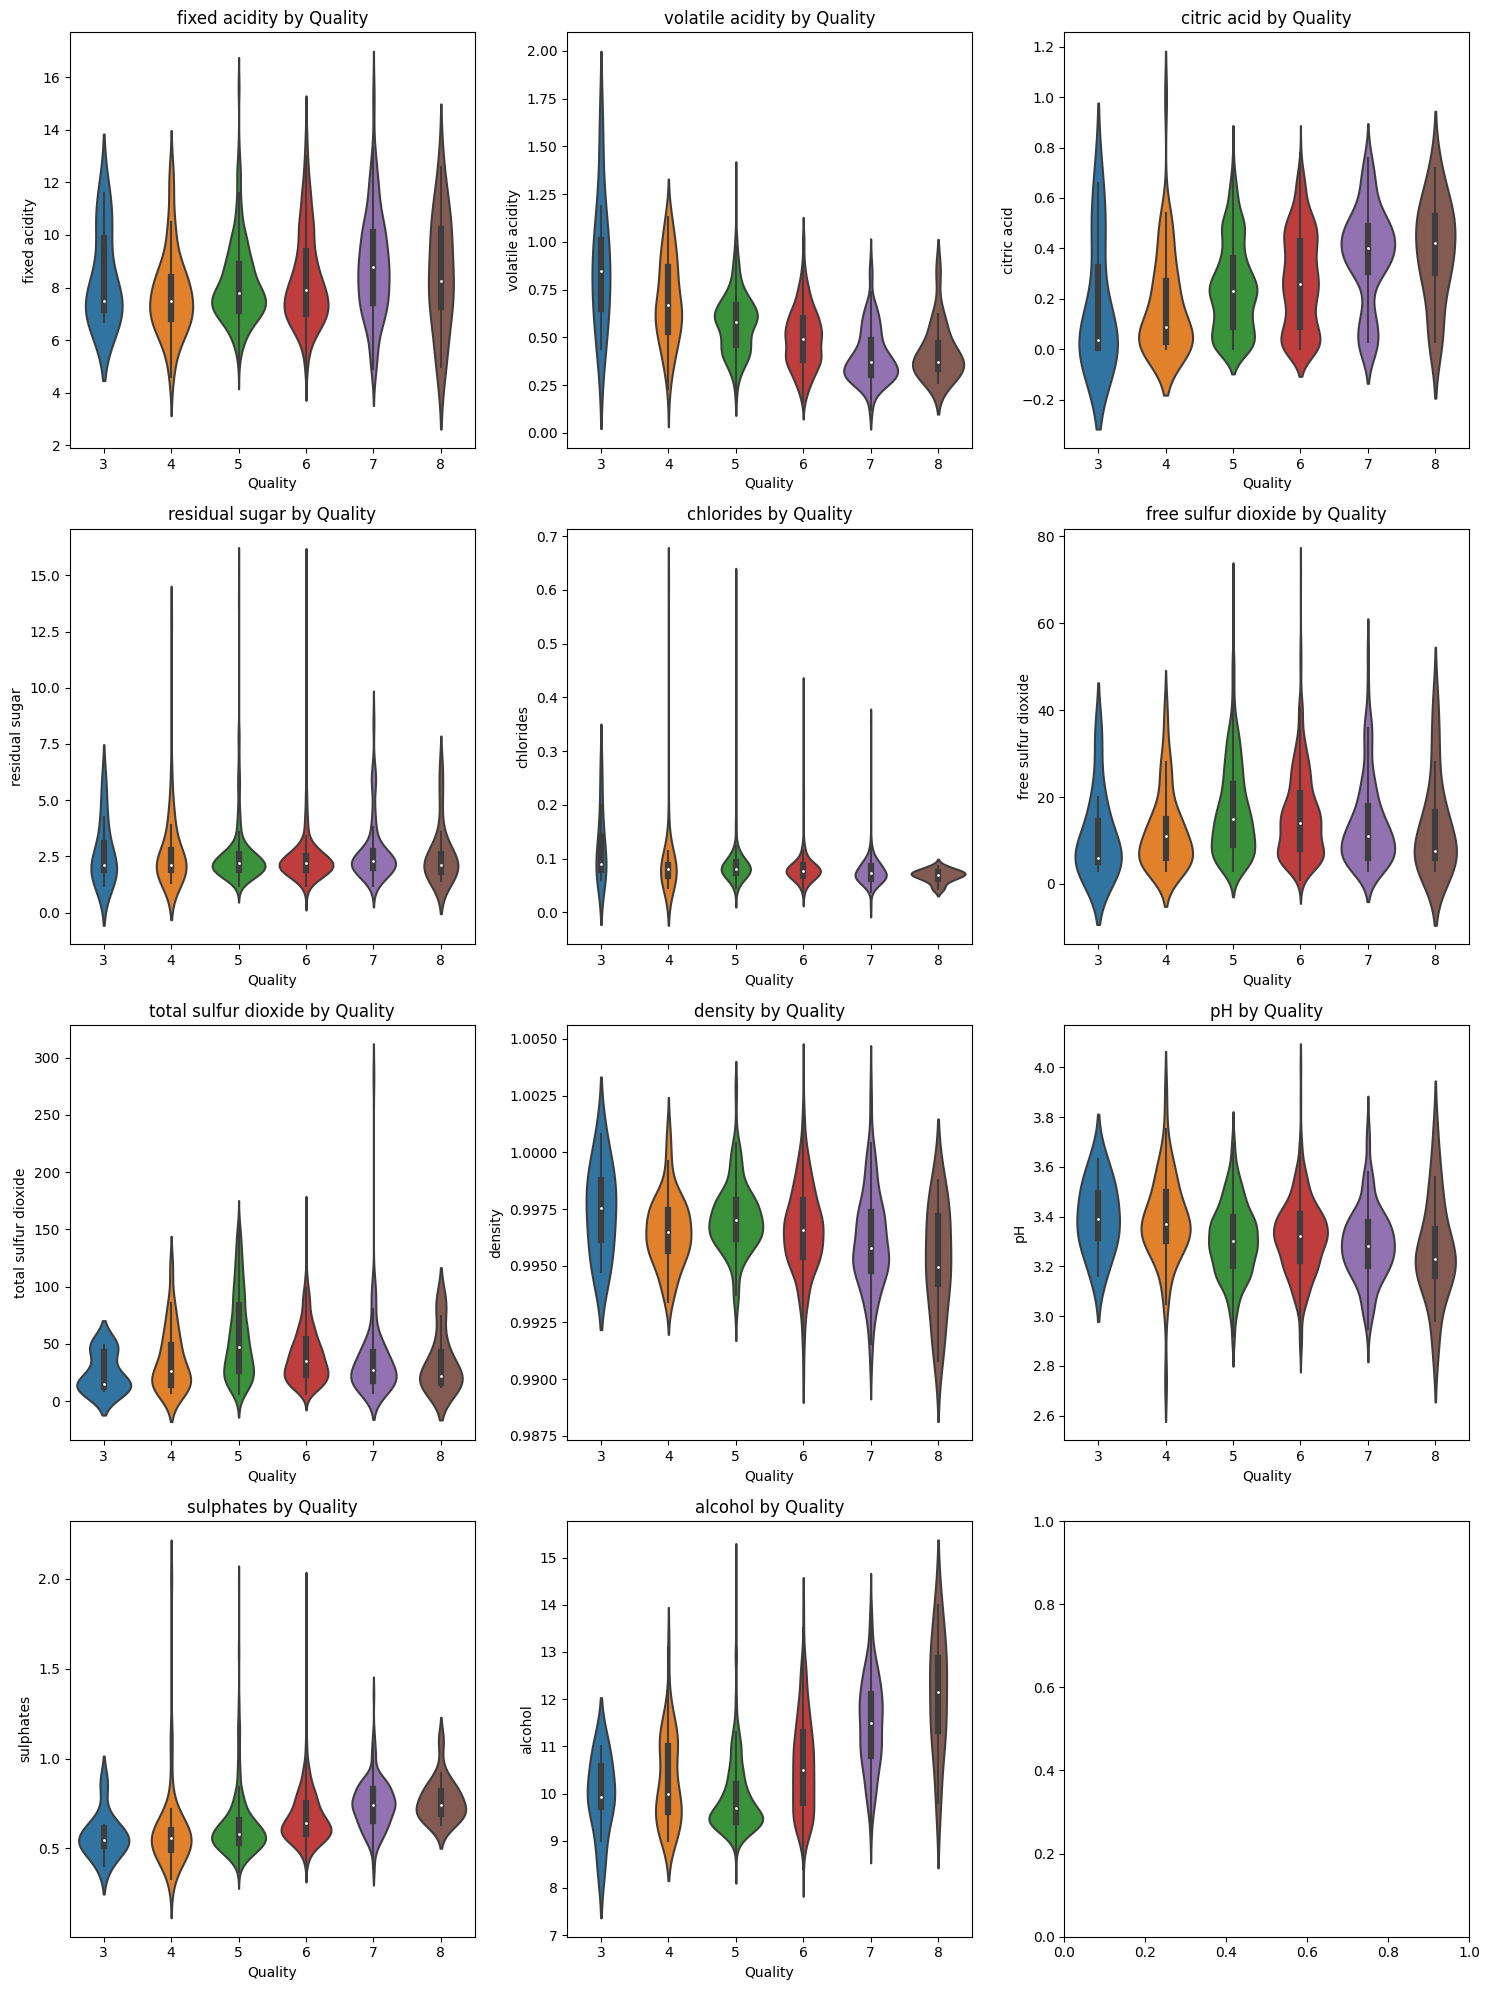

In [15]:
def plot_quality_feature_violin(data):
    features = wine_data.columns[:-1]  # Get all attributes, we assume the last column is "quality"
    
    num_features = len(features)
    num_cols = 3  # You can adjust it to fit three plots in two columns
    num_rows = (num_features - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols

        ax = axes[row, col]
        sns.violinplot(data=data, x='quality', y=feature, ax=ax)
        ax.set_title(f'{feature} by Quality', fontsize=12)
        ax.set_xlabel('Quality', fontsize=10)
        ax.set_ylabel(feature, fontsize=10)

    plt.tight_layout()
    plt.show()

plot_quality_feature_violin(wine_data)

# Preprocessing

In [16]:
# splitting features
X = wine_data.drop("quality", axis=1)  # Independent variables
y = wine_data["quality"]  # target variable

In [17]:
from sklearn.model_selection import train_test_split
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training data with classification algorithms 1st part is standard scaler

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data set scaling and splitting operations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling data
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classification models
logistic_model = LogisticRegression(solver="liblinear")
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()

# Train classification models
logistic_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# Making predictions with classification models
logistic_predictions = logistic_model.predict(X_test_scaled)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
random_forest_predictions = random_forest_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate classification model performance
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# printing the results
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)



Logistic Regression Accuracy: 0.565625
Decision Tree Accuracy: 0.56875
Random Forest Accuracy: 0.65625
KNN Accuracy: 0.546875
SVM Accuracy: 0.603125


# Training data with classification algorithms 2nd part is with MinMax Scaler

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Data set scaling and splitting operations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classification models
logistic_model = LogisticRegression(solver="liblinear")
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()

# Training the models
logistic_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# Sınıflandırma modelleriyle tahmin yapma
logistic_predictions = logistic_model.predict(X_test_scaled)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
random_forest_predictions = random_forest_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)
svm_predictions = svm_model.predict(X_test_scaled)

# evaluate the performance of the models
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# print results
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)


Logistic Regression Accuracy: 0.559375
Decision Tree Accuracy: 0.58125
Random Forest Accuracy: 0.65625
KNN Accuracy: 0.528125
SVM Accuracy: 0.596875


# We reduced the variety of quality points from 6 to 3

In [20]:
#We are copying the data set.
wine_data_copy = wine_data.copy()

# We reduce the quality level to 3
wine_data_copy['quality'] = wine_data_copy['quality'].replace({3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3})

# We are checking the new quality values
print(wine_data_copy['quality'].value_counts())

quality
2    1319
3     217
1      63
Name: count, dtype: int64


In [21]:
X_cp = wine_data_copy.drop("quality", axis=1)  # Independent variables
y_cp = wine_data_copy["quality"] # target

In [22]:
X_cp_train, X_cp_test, y_cp_train, y_cp_test = train_test_split(X_cp, y_cp, test_size=0.2, random_state=42)

# Training with standard scaler

In [23]:
scaler = StandardScaler()
X_cp_train_scaled = scaler.fit_transform(X_cp_train)
X_cp_test_scaled = scaler.transform(X_cp_test)

# define new Classification models
logistic_model2 = LogisticRegression(solver="liblinear")
decision_tree_model2 = DecisionTreeClassifier()
random_forest_model2 = RandomForestClassifier()
knn_model2 = KNeighborsClassifier()
svm_model2 = SVC()

# Train new classification models
logistic_model2.fit(X_cp_train_scaled, y_cp_train)
decision_tree_model2.fit(X_cp_train_scaled, y_cp_train)
random_forest_model2.fit(X_cp_train_scaled, y_cp_train)
knn_model2.fit(X_cp_train_scaled, y_cp_train)
svm_model2.fit(X_cp_train_scaled, y_cp_train)

# Making predictions with new classification models
logistic_predictions2 = logistic_model2.predict(X_cp_test_scaled)
decision_tree_predictions2 = decision_tree_model2.predict(X_test_scaled)
random_forest_predictions2 = random_forest_model2.predict(X_test_scaled)
knn_predictions2 = knn_model2.predict(X_test_scaled)
svm_predictions2 = svm_model2.predict(X_test_scaled)

# Evaluate new classification model performance
logistic_accuracy2 = accuracy_score(y_cp_test, logistic_predictions2)
decision_tree_accuracy2 = accuracy_score(y_cp_test, decision_tree_predictions2)
random_forest_accuracy2 = accuracy_score(y_cp_test, random_forest_predictions2)
knn_accuracy2 = accuracy_score(y_cp_test, knn_predictions2)
svm_accuracy2 = accuracy_score(y_cp_test, svm_predictions2)

# print new results for new models with standard scaler
print("Logistic Regression Accuracy:", logistic_accuracy2)
print("Decision Tree Accuracy:", decision_tree_accuracy2)
print("Random Forest Accuracy:", random_forest_accuracy2)
print("KNN Accuracy:", knn_accuracy2)
print("SVM Accuracy:", svm_accuracy2)

Logistic Regression Accuracy: 0.828125
Decision Tree Accuracy: 0.803125
Random Forest Accuracy: 0.81875
KNN Accuracy: 0.81875
SVM Accuracy: 0.81875


# Training with MinMax Scaler

In [24]:
scaler = MinMaxScaler()
X_cp_train_scaled = scaler.fit_transform(X_cp_train)
X_cp_test_scaled = scaler.transform(X_cp_test)

# define new Classification models
logistic_model2 = LogisticRegression(solver="liblinear")
decision_tree_model2 = DecisionTreeClassifier()
random_forest_model2 = RandomForestClassifier()
knn_model2 = KNeighborsClassifier()
svm_model2 = SVC()

# Train new classification models
logistic_model2.fit(X_cp_train_scaled, y_cp_train)
decision_tree_model2.fit(X_cp_train_scaled, y_cp_train)
random_forest_model2.fit(X_cp_train_scaled, y_cp_train)
knn_model2.fit(X_cp_train_scaled, y_cp_train)
svm_model2.fit(X_cp_train_scaled, y_cp_train)

# Making predictions with new classification models
logistic_predictions2 = logistic_model2.predict(X_cp_test_scaled)
decision_tree_predictions2 = decision_tree_model2.predict(X_test_scaled)
random_forest_predictions2 = random_forest_model2.predict(X_test_scaled)
knn_predictions2 = knn_model2.predict(X_test_scaled)
svm_predictions2 = svm_model2.predict(X_test_scaled)

# Evaluate new classification model performance
logistic_accuracy2 = accuracy_score(y_cp_test, logistic_predictions2)
decision_tree_accuracy2 = accuracy_score(y_cp_test, decision_tree_predictions2)
random_forest_accuracy2 = accuracy_score(y_cp_test, random_forest_predictions2)
knn_accuracy2 = accuracy_score(y_cp_test, knn_predictions2)
svm_accuracy2 = accuracy_score(y_cp_test, svm_predictions2)

# print new results for new models with minmax scaler
print("Logistic Regression Accuracy:", logistic_accuracy2)
print("Decision Tree Accuracy:", decision_tree_accuracy2)
print("Random Forest Accuracy:", random_forest_accuracy2)
print("KNN Accuracy:", knn_accuracy2)
print("SVM Accuracy:", svm_accuracy2)

Logistic Regression Accuracy: 0.828125
Decision Tree Accuracy: 0.8
Random Forest Accuracy: 0.865625
KNN Accuracy: 0.8375
SVM Accuracy: 0.8375
